In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Malignant Samples from Training Data:


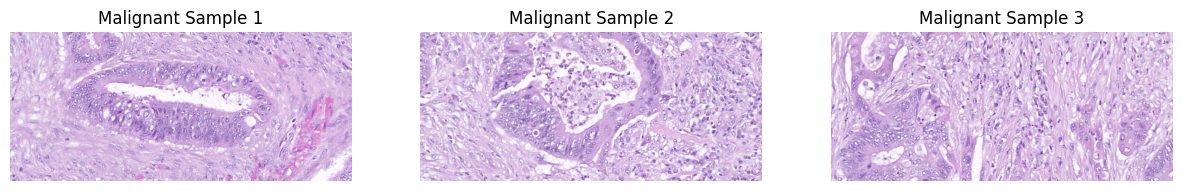

Benign Samples from Training Data:


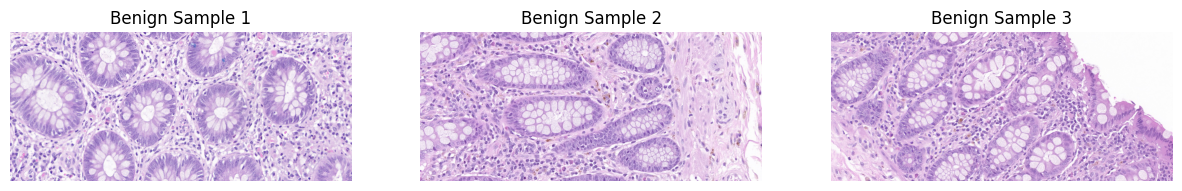

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Visualizing augmented images for Malignant category:


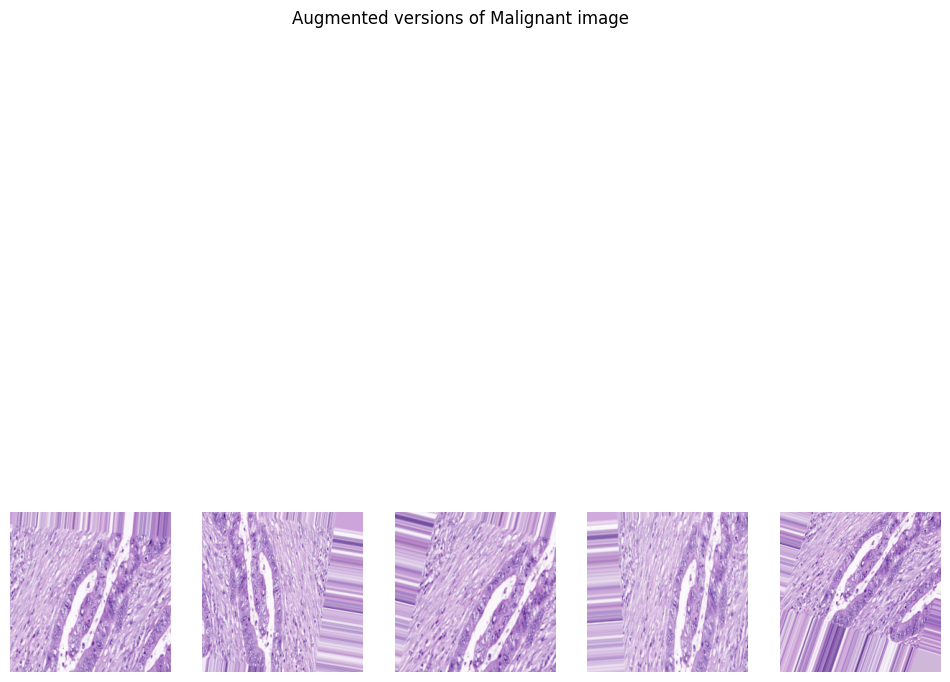

Visualizing augmented images for Benign category:


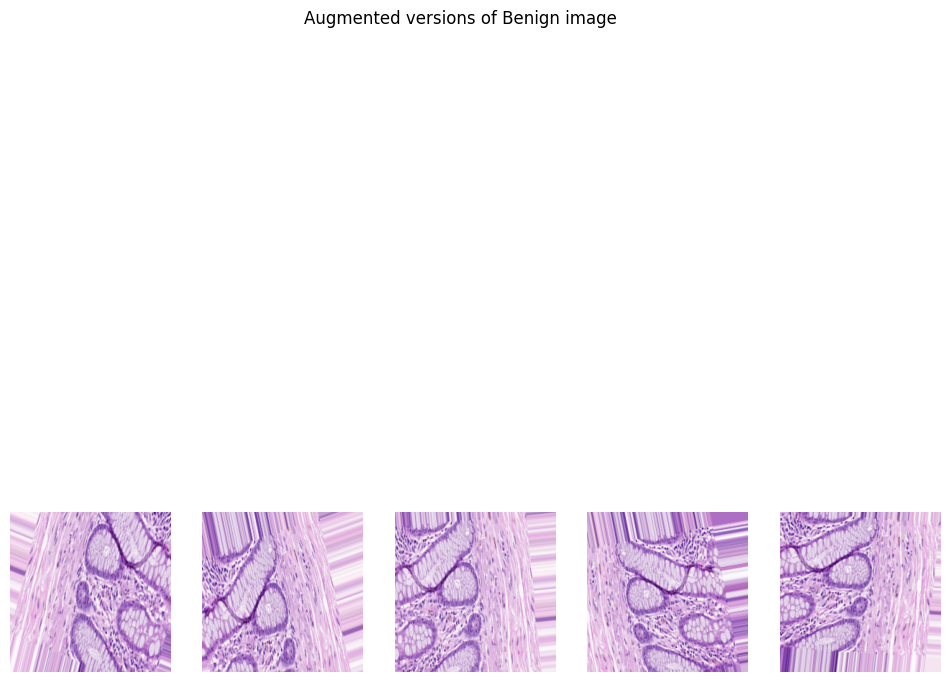

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Display sample images
def display_sample_images(category, image_folder, num_samples=3):
    folder_path = os.path.join(image_folder, category)
    images = os.listdir(folder_path)
    sample_images = random.sample(images, num_samples)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images, 1):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.title(f'{category} Sample {i}')
        plt.axis('off')
    plt.show()

def visualize_augmented_images(datagen, category, image_folder, num_samples=5):
    folder_path = os.path.join(image_folder, category)
    img_name = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    img_array = img_to_array(img.resize((224, 224)))
    img_array = img_array.reshape((1, ) + img_array.shape)  # Reshape for flow method

    plt.figure(figsize=(12, 12))
    i = 0
    for batch in datagen.flow(img_array, batch_size=1):
        plt.subplot(1, num_samples, i + 1)
        augmented_img = array_to_img(batch[0])
        plt.imshow(augmented_img)
        plt.axis('off')
        i += 1
        if i >= num_samples:
            break
    plt.suptitle(f'Augmented versions of {category} image')
    plt.show()

print("Malignant Samples from Training Data:")
display_sample_images('Malignant', train_dir)

print("Benign Samples from Training Data:")
display_sample_images('Benign', train_dir)

# Image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
target_size = (224, 224)  # Resize images to 224x224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize augmented images
print("Visualizing augmented images for Malignant category:")
visualize_augmented_images(train_datagen, 'Malignant', train_dir)

print("Visualizing augmented images for Benign category:")
visualize_augmented_images(train_datagen, 'Benign', train_dir)



In [10]:
pip install lpips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Malignant Samples from Training Data:


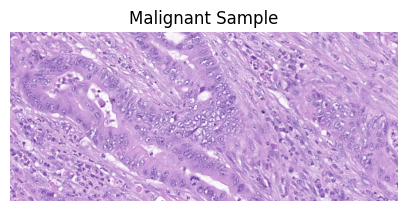

Visualizing augmented images for Malignant category:


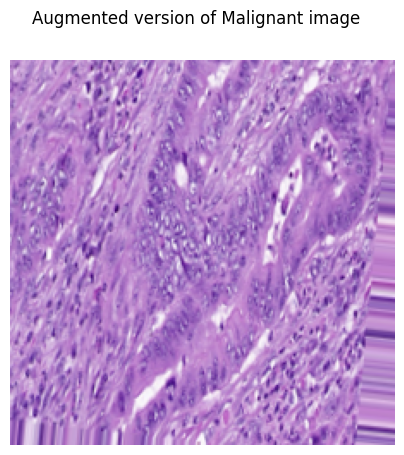

1/1 [==============================] - 1s 874ms/step
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
Augmented Image: PSNR = 2.43, SSIM = -0.0000, Feature Distance = 933.3941, LPIPS = 0.4531


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from skimage.metrics import structural_similarity as ssim
import lpips  # Import LPIPS library

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Display sample images
def display_sample_images(category, image_folder, index=3):
    folder_path = os.path.join(image_folder, category)
    images = os.listdir(folder_path)
    img_name = images[index]

    plt.figure(figsize=(5, 5))
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'{category} Sample')
    plt.axis('off')
    plt.show()

    return img_name

def visualize_augmented_image(datagen, category, image_folder, img_name):
    folder_path = os.path.join(image_folder, category)
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    img_array = img_to_array(img.resize((224, 224)))
    img_array = img_array.reshape((1, ) + img_array.shape)  # Reshape for flow method

    plt.figure(figsize=(5, 5))
    batch = next(datagen.flow(img_array, batch_size=1))
    augmented_img = array_to_img(batch[0])
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.suptitle(f'Augmented version of {category} image')
    plt.show()

    return batch[0]

def compute_metrics(original_img, augmented_img):
    original = np.array(original_img, dtype=np.float32)
    augmented = np.array(augmented_img, dtype=np.float32)

    # Compute PSNR
    psnr_value = cv2.PSNR(original, augmented)

    # Compute SSIM
    ssim_value = ssim(original, augmented, channel_axis=2)

    # Compute Feature-Based Metric using VGG16
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    feature_extractor = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)

    original_preprocessed = vgg16_preprocess_input(original.astype(np.float32))
    augmented_preprocessed = vgg16_preprocess_input(augmented.astype(np.float32))

    original_features = feature_extractor.predict(np.expand_dims(original_preprocessed, axis=0))
    augmented_features = feature_extractor.predict(np.expand_dims(augmented_preprocessed, axis=0))

    feature_distance = np.linalg.norm(original_features - augmented_features)

    return psnr_value, ssim_value, feature_distance

def compute_lpips(original_img, augmented_img):
    loss_fn = lpips.LPIPS(net='alex')  # Choose 'alex', 'vgg', or 'squeeze'

    original = img_to_array(original_img.resize((224, 224))).astype(np.float32)
    augmented = img_to_array(array_to_img(augmented_img).resize((224, 224))).astype(np.float32)

    original = lpips.im2tensor(original)  # Convert to LPIPS tensor
    augmented = lpips.im2tensor(augmented)  # Convert to LPIPS tensor

    lpips_value = loss_fn(original, augmented).item()

    return lpips_value

# Image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
target_size = (224, 224)  # Resize images to 224x224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize sample and augmented images with metrics
category = 'Malignant'
print(f"{category} Samples from Training Data:")
img_name = display_sample_images(category, train_dir)

print(f"Visualizing augmented images for {category} category:")
augmented_image = visualize_augmented_image(train_datagen, category, train_dir, img_name)

# Compute metrics for the augmented image
original_image_path = os.path.join(train_dir, category, img_name)
original_image = Image.open(original_image_path).resize((224, 224))

psnr_value, ssim_value, feature_distance = compute_metrics(original_image, augmented_image)
lpips_value = compute_lpips(original_image, augmented_image)
print(f"Augmented Image: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}, Feature Distance = {feature_distance:.4f}, LPIPS = {lpips_value:.4f}")


Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Malignant Samples from Training Data:


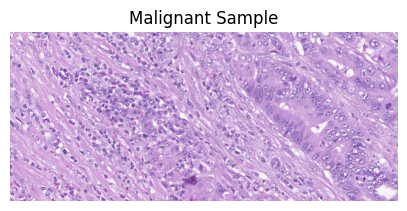

Visualizing augmented images for Malignant category:


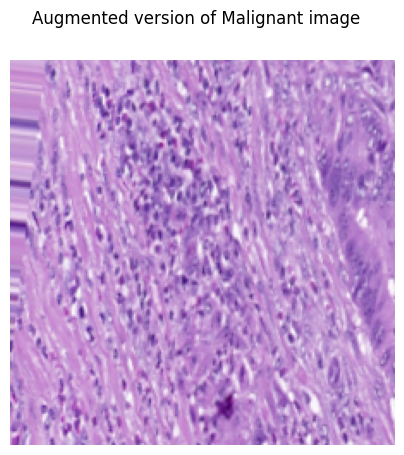

1/1 [==============================] - 1s 903ms/step
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
Augmented Image: PSNR = 2.36, SSIM = 0.0000, Feature Distance = 756.4359, LPIPS = 0.4012


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from skimage.metrics import structural_similarity as ssim
import lpips  # Import LPIPS library

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Display sample images
def display_sample_images(category, image_folder, index=2):
    folder_path = os.path.join(image_folder, category)
    images = os.listdir(folder_path)
    img_name = images[index]

    plt.figure(figsize=(5, 5))
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'{category} Sample')
    plt.axis('off')
    plt.show()

    return img_name

def visualize_augmented_image(datagen, category, image_folder, img_name):
    folder_path = os.path.join(image_folder, category)
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    img_array = img_to_array(img.resize((224, 224)))
    img_array = img_array.reshape((1, ) + img_array.shape)  # Reshape for flow method

    plt.figure(figsize=(5, 5))
    batch = next(datagen.flow(img_array, batch_size=1))
    augmented_img = array_to_img(batch[0])
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.suptitle(f'Augmented version of {category} image')
    plt.show()

    return batch[0]

def compute_metrics(original_img, augmented_img):
    original = np.array(original_img, dtype=np.float32)
    augmented = np.array(augmented_img, dtype=np.float32)

    # Compute PSNR
    psnr_value = cv2.PSNR(original, augmented)

    # Compute SSIM
    ssim_value = ssim(original, augmented, channel_axis=2)

    # Compute Feature-Based Metric using VGG16
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    feature_extractor = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)

    original_preprocessed = vgg16_preprocess_input(original.astype(np.float32))
    augmented_preprocessed = vgg16_preprocess_input(augmented.astype(np.float32))

    original_features = feature_extractor.predict(np.expand_dims(original_preprocessed, axis=0))
    augmented_features = feature_extractor.predict(np.expand_dims(augmented_preprocessed, axis=0))

    feature_distance = np.linalg.norm(original_features - augmented_features)

    return psnr_value, ssim_value, feature_distance

def compute_lpips(original_img, augmented_img):
    loss_fn = lpips.LPIPS(net='alex')  # Choose 'alex', 'vgg', or 'squeeze'

    original = img_to_array(original_img.resize((224, 224))).astype(np.float32)
    augmented = img_to_array(array_to_img(augmented_img).resize((224, 224))).astype(np.float32)

    original = lpips.im2tensor(original)  # Convert to LPIPS tensor
    augmented = lpips.im2tensor(augmented)  # Convert to LPIPS tensor

    lpips_value = loss_fn(original, augmented).item()

    return lpips_value

# Image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
target_size = (224, 224)  # Resize images to 224x224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize sample and augmented images with metrics
category = 'Malignant'
print(f"{category} Samples from Training Data:")
img_name = display_sample_images(category, train_dir)

print(f"Visualizing augmented images for {category} category:")
augmented_image = visualize_augmented_image(train_datagen, category, train_dir, img_name)

# Compute metrics for the augmented image
original_image_path = os.path.join(train_dir, category, img_name)
original_image = Image.open(original_image_path).resize((224, 224))

psnr_value, ssim_value, feature_distance = compute_metrics(original_image, augmented_image)
lpips_value = compute_lpips(original_image, augmented_image)
print(f"Augmented Image: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}, Feature Distance = {feature_distance:.4f}, LPIPS = {lpips_value:.4f}")


Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Malignant Samples from Training Data:


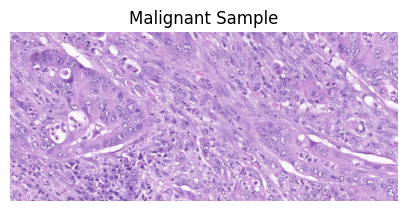

Visualizing augmented images for Malignant category:


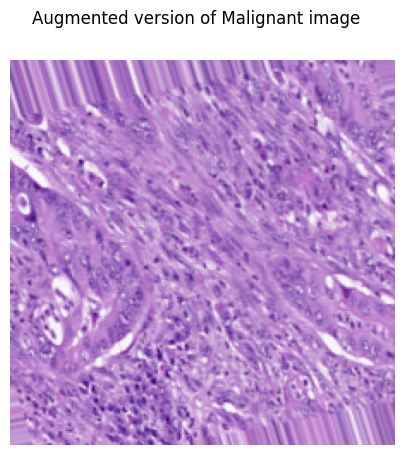

1/1 [==============================] - 1s 554ms/step
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
Augmented Image: PSNR = 2.43, SSIM = -0.0000, Feature Distance = 789.1549, LPIPS = 0.3390


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from skimage.metrics import structural_similarity as ssim
import lpips  # Import LPIPS library

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Display sample images
def display_sample_images(category, image_folder, index=5):
    folder_path = os.path.join(image_folder, category)
    images = os.listdir(folder_path)
    img_name = images[index]

    plt.figure(figsize=(5, 5))
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'{category} Sample')
    plt.axis('off')
    plt.show()

    return img_name

def visualize_augmented_image(datagen, category, image_folder, img_name):
    folder_path = os.path.join(image_folder, category)
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    img_array = img_to_array(img.resize((224, 224)))
    img_array = img_array.reshape((1, ) + img_array.shape)  # Reshape for flow method

    plt.figure(figsize=(5, 5))
    batch = next(datagen.flow(img_array, batch_size=1))
    augmented_img = array_to_img(batch[0])
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.suptitle(f'Augmented version of {category} image')
    plt.show()

    return batch[0]

def compute_metrics(original_img, augmented_img):
    original = np.array(original_img, dtype=np.float32)
    augmented = np.array(augmented_img, dtype=np.float32)

    # Compute PSNR
    psnr_value = cv2.PSNR(original, augmented)

    # Compute SSIM
    ssim_value = ssim(original, augmented, channel_axis=2)

    # Compute Feature-Based Metric using VGG16
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    feature_extractor = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)

    original_preprocessed = vgg16_preprocess_input(original.astype(np.float32))
    augmented_preprocessed = vgg16_preprocess_input(augmented.astype(np.float32))

    original_features = feature_extractor.predict(np.expand_dims(original_preprocessed, axis=0))
    augmented_features = feature_extractor.predict(np.expand_dims(augmented_preprocessed, axis=0))

    feature_distance = np.linalg.norm(original_features - augmented_features)

    return psnr_value, ssim_value, feature_distance

def compute_lpips(original_img, augmented_img):
    loss_fn = lpips.LPIPS(net='alex')  # Choose 'alex', 'vgg', or 'squeeze'

    original = img_to_array(original_img.resize((224, 224))).astype(np.float32)
    augmented = img_to_array(array_to_img(augmented_img).resize((224, 224))).astype(np.float32)

    original = lpips.im2tensor(original)  # Convert to LPIPS tensor
    augmented = lpips.im2tensor(augmented)  # Convert to LPIPS tensor

    lpips_value = loss_fn(original, augmented).item()

    return lpips_value

# Image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
target_size = (224, 224)  # Resize images to 224x224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize sample and augmented images with metrics
category = 'Malignant'
print(f"{category} Samples from Training Data:")
img_name = display_sample_images(category, train_dir)

print(f"Visualizing augmented images for {category} category:")
augmented_image = visualize_augmented_image(train_datagen, category, train_dir, img_name)

# Compute metrics for the augmented image
original_image_path = os.path.join(train_dir, category, img_name)
original_image = Image.open(original_image_path).resize((224, 224))

psnr_value, ssim_value, feature_distance = compute_metrics(original_image, augmented_image)
lpips_value = compute_lpips(original_image, augmented_image)
print(f"Augmented Image: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}, Feature Distance = {feature_distance:.4f}, LPIPS = {lpips_value:.4f}")


Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Malignant Samples from Training Data:


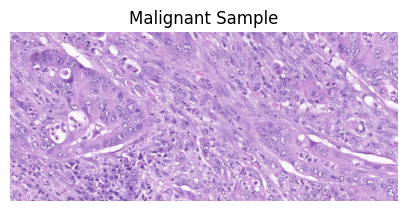

Visualizing augmented images for Malignant category:


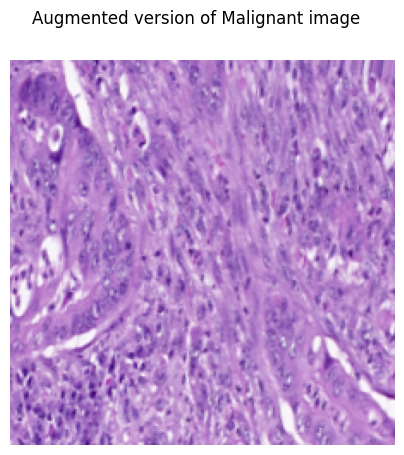

1/1 [==============================] - 1s 527ms/step
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
Augmented Image: PSNR = 2.43, SSIM = 0.0000, Feature Distance = 789.1907, LPIPS = 0.2916


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from skimage.metrics import structural_similarity as ssim
import lpips  # Import LPIPS library

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Display sample images
def display_sample_images(category, image_folder, index=5):
    folder_path = os.path.join(image_folder, category)
    images = os.listdir(folder_path)
    img_name = images[index]

    plt.figure(figsize=(5, 5))
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'{category} Sample')
    plt.axis('off')
    plt.show()

    return img_name

def visualize_augmented_image(datagen, category, image_folder, img_name):
    folder_path = os.path.join(image_folder, category)
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    img_array = img_to_array(img.resize((224, 224)))
    img_array = img_array.reshape((1, ) + img_array.shape)  # Reshape for flow method

    plt.figure(figsize=(5, 5))
    batch = next(datagen.flow(img_array, batch_size=1))
    augmented_img = array_to_img(batch[0])
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.suptitle(f'Augmented version of {category} image')
    plt.show()

    return batch[0]

def compute_metrics(original_img, augmented_img):
    original = np.array(original_img, dtype=np.float32)
    augmented = np.array(augmented_img, dtype=np.float32)

    # Compute PSNR
    psnr_value = cv2.PSNR(original, augmented)

    # Compute SSIM
    ssim_value = ssim(original, augmented, channel_axis=2)

    # Compute Feature-Based Metric using VGG16
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    feature_extractor = Model(inputs=vgg16.input, outputs=vgg16.layers[-1].output)

    original_preprocessed = vgg16_preprocess_input(original.astype(np.float32))
    augmented_preprocessed = vgg16_preprocess_input(augmented.astype(np.float32))

    original_features = feature_extractor.predict(np.expand_dims(original_preprocessed, axis=0))
    augmented_features = feature_extractor.predict(np.expand_dims(augmented_preprocessed, axis=0))

    feature_distance = np.linalg.norm(original_features - augmented_features)

    return psnr_value, ssim_value, feature_distance

def compute_lpips(original_img, augmented_img):
    loss_fn = lpips.LPIPS(net='alex')  # Choose 'alex', 'vgg', or 'squeeze'

    original = img_to_array(original_img.resize((224, 224))).astype(np.float32)
    augmented = img_to_array(array_to_img(augmented_img).resize((224, 224))).astype(np.float32)

    original = lpips.im2tensor(original)  # Convert to LPIPS tensor
    augmented = lpips.im2tensor(augmented)  # Convert to LPIPS tensor

    lpips_value = loss_fn(original, augmented).item()

    return lpips_value

# Image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
target_size = (224, 224)  # Resize images to 224x224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize sample and augmented images with metrics
category = 'Malignant'
print(f"{category} Samples from Training Data:")
img_name = display_sample_images(category, train_dir)

print(f"Visualizing augmented images for {category} category:")
augmented_image = visualize_augmented_image(train_datagen, category, train_dir, img_name)

# Compute metrics for the augmented image
original_image_path = os.path.join(train_dir, category, img_name)
original_image = Image.open(original_image_path).resize((224, 224))

psnr_value, ssim_value, feature_distance = compute_metrics(original_image, augmented_image)
lpips_value = compute_lpips(original_image, augmented_image)
print(f"Augmented Image: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}, Feature Distance = {feature_distance:.4f}, LPIPS = {lpips_value:.4f}")
